In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('Breast_cancer_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
missing_values_count = df.isnull().sum()
missing_values_count

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [6]:
df.shape

(569, 31)

In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis']) # M:1, B:0
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [9]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['diagnosis'], test_size = 0.2, random_state = random_state)
X_train.shape, y_train.shape

((455, 30), (455,))

In [10]:
scale = RobustScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [11]:
decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel.fit(X_train,y_train)
decisionTreeModel.score(X_train,y_train)

1.0

In [12]:
predDecisionTree = decisionTreeModel.predict(X_test)

In [13]:
print("Actual breast cancer : ")
print(y_test.values)

print("\nPredicted breast cancer : ")
print(predDecisionTree)

print("\nAccuracy score : %f" %(accuracy_score(y_test, predDecisionTree) * 100))

Actual breast cancer : 
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]

Predicted breast cancer : 
[0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1
 0 0 1]

Accuracy score : 93.859649


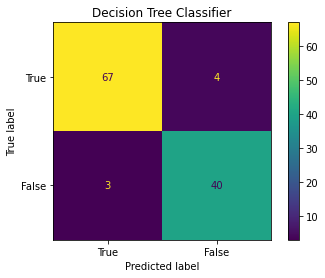

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [31]:
cm= confusion_matrix(y_test,predDecisionTree)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[True,False])
cm_display.plot()
plt.title("Decision Tree Classifier")
plt.show()
print(classification_report(y_test,predDecisionTree))

In [15]:
regressionModel = LogisticRegression(solver='newton-cg')
regressionModel.fit(X_train,y_train)
regressionModel.score(X_train,y_train)

0.9868131868131869

In [16]:
predRegression =regressionModel.predict(X_test)

In [17]:
print("Actual breast cancer : ")
print(y_test.values)

print("\nPredicted breast cancer : ")
print(predRegression)

print("\nAccuracy score : %f" %(accuracy_score(y_test, predRegression) * 100))

Actual breast cancer : 
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]

Predicted breast cancer : 
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]

Accuracy score : 98.245614


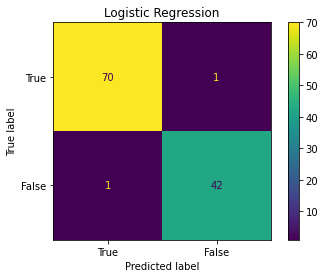

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [32]:
cm= confusion_matrix(y_test,predRegression)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[True,False])
cm_display.plot()
plt.title("Logistic Regression")
plt.show()
print(classification_report(y_test,predRegression))

In [19]:
KNNModel = KNeighborsClassifier(n_neighbors=5,leaf_size=1, weights='uniform')
KNNModel.fit(X_train,y_train)
KNNModel.score(X_train,y_train)

0.9758241758241758

In [20]:
predKNN =KNNModel.predict(X_test)

In [21]:
print("Actual breast cancer : ")
print(y_test.values)

print("\nPredicted breast cancer : ")
print(predKNN)

print("\nAccuracy score : %f" %(accuracy_score(y_test, predKNN) * 100))

Actual breast cancer : 
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]

Predicted breast cancer : 
[0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]

Accuracy score : 95.614035


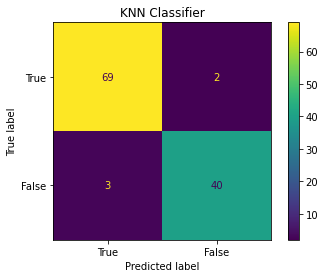

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [33]:
cm= confusion_matrix(y_test,predKNN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[True,False])
cm_display.plot()
plt.title("KNN Classifier")
plt.show()
print(classification_report(y_test,predKNN))

In [23]:
NB=GaussianNB()
NB.fit(X_train,y_train)
NB.score(X_train,y_train)

0.9362637362637363

In [24]:
predNB =NB.predict(X_test)

In [25]:
print("Actual breast cancer : ")
print(y_test.values)

print("\nPredicted breast cancer : ")
print(predNB)

print("\nAccuracy score : %f" %(accuracy_score(y_test, predNB) * 100))

Actual breast cancer : 
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]

Predicted breast cancer : 
[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]

Accuracy score : 96.491228


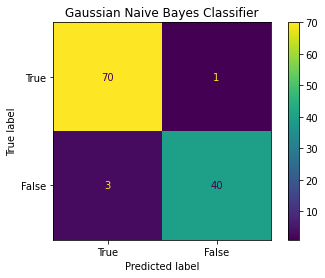

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [34]:
cm= confusion_matrix(y_test,predNB)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[True,False])
cm_display.plot()
plt.title("Gaussian Naive Bayes Classifier")
plt.show()
print(classification_report(y_test,predKNN))

In [27]:
randomFModel = RandomForestClassifier()
randomFModel.fit(X_train, y_train)
randomFModel.score(X_train,y_train)

1.0

In [28]:
predRandomF=randomFModel.predict(X_test)

In [29]:
print("Actual breast cancer : ")
print(y_test.values)

print("\nPredicted breast cancer : ")
print(predRandomF)

print("\nAccuracy score : %f" %(accuracy_score(y_test, predRandomF) * 100))

Actual breast cancer : 
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]

Predicted breast cancer : 
[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]

Accuracy score : 96.491228


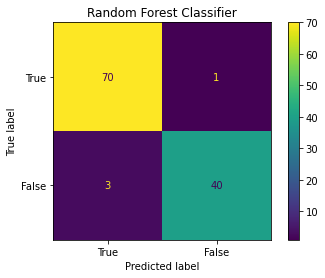

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [35]:
cm= confusion_matrix(y_test,predRandomF)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[True,False])
cm_display.plot()
plt.title("Random Forest Classifier")
plt.show()
print(classification_report(y_test,predRandomF))